In [1]:
from kolomna import dataset as ds
from kolomna import rls_kolomna as rkol
# import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

trn_filename = '.\\kolomna\\dataset\\kolomna_trn.csv'
val_filename = '.\\kolomna\\dataset\\kolomna_val.csv'

In [22]:
n_features = 32   # число отбираемых НЧ отсчетов АПФ
n_means=10        # число усредняемых реализаций
print('Загрузка данных')
train_set = ds.Track.load_from_path(path='.\\kolomna\\dataset\\raw_data\\')        # файлы обучающей выборки
valid_set = ds.Track.load_from_path(path='.\\kolomna\\dataset\\raw_data_valid\\')  # файлы тестовой выборки
print('Сохранение *.csv:')
ds.Track.set_to_csv(train_set, filename=trn_filename, n_features=n_features, n_means=n_means)
ds.Track.set_to_csv(valid_set, filename=val_filename, n_features=n_features, n_means=n_means)

Загрузка данных
Сохранение *.csv:
Dataset .\kolomna\dataset\kolomna_trn.csv saved
Dataset .\kolomna\dataset\kolomna_val.csv saved


Сохранение *.csv:
Dataset .\kolomna\dataset\kolomna_all.csv saved
153  in  UAVplane ,  153  in  bird


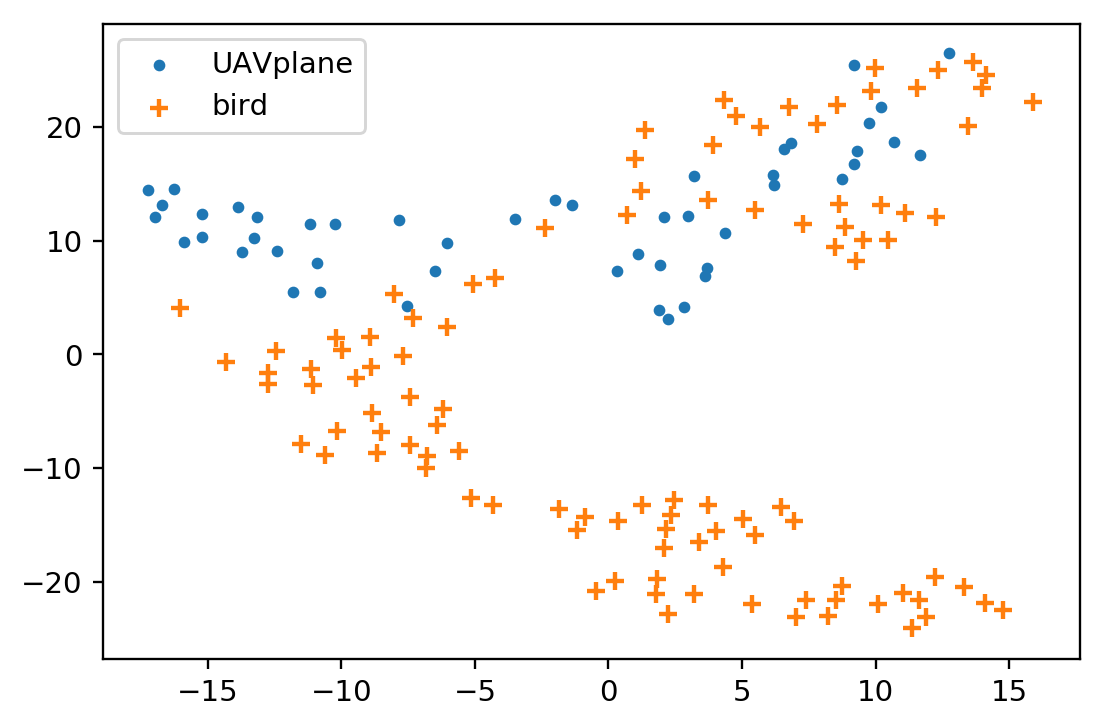

In [23]:
# Предварительный T-SNE анализ на полном множестве данных
full_set = ds.Track.load_from_path(path='.\\kolomna\\dataset\\raw_data_all\\')  # формирование файлов полной выборки
print('Сохранение *.csv:')
ds.Track.set_to_csv(full_set, filename='.\\kolomna\\dataset\\kolomna_all.csv', n_features=n_features, n_means=n_means)
full_set = rkol.Dataset(filename='.\\kolomna\\dataset\\kolomna_all.csv')    # загрузка выборки

tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=15)   # настройка t-SNE анализа
Y = tsne.fit_transform(full_set.features)                                   # t-SNE анализ
print(len(full_set.targets==0), ' in ', full_set.class_names[0],', ', len(full_set.targets==1),' in ', full_set.class_names[1])
# Вывод результатов t-SNE анализа
plt.figure(num=None, figsize=(6, 4), dpi=210, facecolor='w', edgecolor='k')
plt.scatter(Y[full_set.targets==0,0],Y[full_set.targets==0,1],marker='.')
plt.scatter(Y[full_set.targets==1,0],Y[full_set.targets==1,1],marker='+')
plt.legend(full_set.class_names)
plt.show()

In [24]:
print('---\nОБУЧЕНИЕ')
n_estimators_tree=32    # элементов композиции "случайный лес"
n_estimators_gbc=42     # элементов композиции "градиентный спуск"
train_set = rkol.Dataset(filename=trn_filename)        # загрузка обучающей выбоки
clfs, sscaler = rkol.clf_compare(dataset=train_set, 
                                 n_estimators_tree=62,
                                 n_estimators_gbc=42)  # обучение классификатора и нормировочного блока

---
ОБУЧЕНИЕ
Набор данных (.\kolomna\dataset\kolomna_trn.csv) загружен из пространства
For RandForrest:
 cross entropy: 0.1762326365821486
 f1 score: 1.0
Normalized confusion matrix
['UAVplane' 'bird']
[[1. 0.]
 [0. 1.]]
For GradBoost:
 cross entropy: 0.051709620373542875
 f1 score: 0.9428571428571428
Normalized confusion matrix
['UAVplane' 'bird']
[[1.         0.        ]
 [0.09090909 0.90909091]]
For SVC:
 cross entropy: 0.10738413956059022
 f1 score: 1.0
Normalized confusion matrix
['UAVplane' 'bird']
[[1. 0.]
 [0. 1.]]


In [29]:
print('---\nВАЛИДАЦИЯ')
valid_set = rkol.Dataset(filename=val_filename)  # загрузка тестовой выборки
x_val = sscaler.transform(valid_set.features)    # нормировка выборки
for clf in clfs:
    rkol.clf_assessment(clf=clf, xts=x_val, yts=valid_set.targets, 
                        class_names=valid_set.class_names, 
                        fspace='val', png=True)


---
ВАЛИДАЦИЯ
For RandomForestClassifier:
 cross entropy: 0.0728029081329112
 f1 score: 1.0
Normalized confusion matrix
['UAVplane' 'bird']
[[1. 0.]
 [0. 1.]]
For GradientBoostingClassifier:
 cross entropy: 0.00023354634997997225
 f1 score: 1.0
Normalized confusion matrix
['UAVplane' 'bird']
[[1. 0.]
 [0. 1.]]
For SVC:
 cross entropy: 0.12626802056801203
 f1 score: 0.9487179487179487
Normalized confusion matrix
['UAVplane' 'bird']
[[0.85714286 0.14285714]
 [0.         1.        ]]


In [30]:
# Дополнительный анализ полного набора данных
full_set = ds.Track.load_from_path(path='.\\kolomna\\dataset\\raw_data_all\\')  # формирование файлов полной выборки
print('Сохранение *.csv:')
ds.Track.set_to_csv(full_set, filename='.\\kolomna\\dataset\\kolomna_all.csv', n_features=n_features, n_means=n_means)
full_set = rkol.Dataset(filename='.\\kolomna\\dataset\\kolomna_all.csv')    # загрузка выборки

# Сравнительная оценка полученных классификаторов на полном наборе данных
x_val = sscaler.transform(full_set.features)  # преобразование признаков
for clf in clfs:
    rkol.clf_assessment(clf=clf, xts=x_val, yts=full_set.targets, 
                        class_names=full_set.class_names, 
                        fspace='all', png=True)



Сохранение *.csv:
Dataset .\kolomna\dataset\kolomna_all.csv saved
For RandomForestClassifier:
 cross entropy: 0.19406405822647926
 f1 score: 0.9422641509433962
Normalized confusion matrix
['UAVplane' 'bird']
[[1.         0.        ]
 [0.07692308 0.92307692]]
For GradientBoostingClassifier:
 cross entropy: 0.385951674415184
 f1 score: 0.9422641509433962
Normalized confusion matrix
['UAVplane' 'bird']
[[1.         0.        ]
 [0.07692308 0.92307692]]
For SVC:
 cross entropy: 0.20918605450487465
 f1 score: 0.8939708939708939
Normalized confusion matrix
['UAVplane' 'bird']
[[0.97959184 0.02040816]
 [0.13461538 0.86538462]]


In [9]:
#rkol.setup_gradboost(sscaler.transform(train_set.features),train_set.targets,n_estimators=30)
clfs

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.4, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=42,
               n_iter_no_change=None, presort='auto', random_state=None,
               subsample=1.0, tol=0.0001, validation_fraction=0.1,
               verbose=0, warm_start=False),
 SVC(C=1.0, ca